Train Accuracy: 1.0
Test Accuracy: 0.9545454545454546


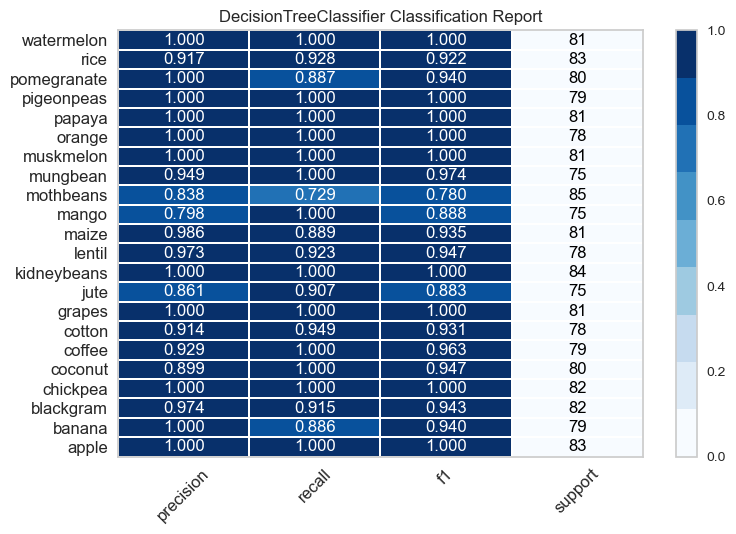

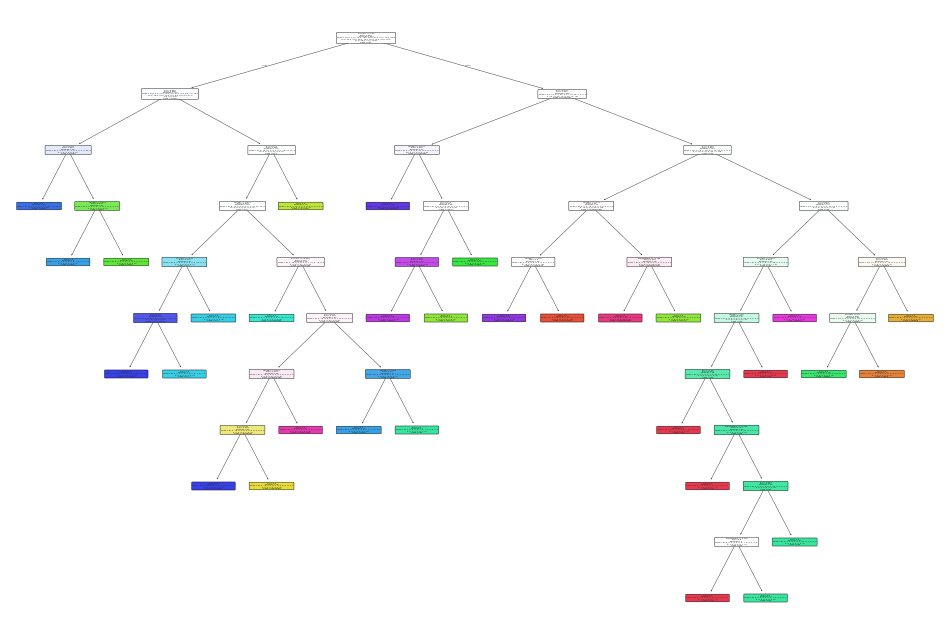

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from yellowbrick.classifier import ClassificationReport

# Load the dataset from the local directory as CSV
file_path = r"C:\Users\HP win10\Desktop\Course Moodle\COM7003 Artificial Intelligence\crop_data.csv"
crops = pd.read_csv(file_path)

# Use Label Encoding on target variable to make it suitable for training
label_encoder = LabelEncoder()
crops["label_encoded"] = label_encoder.fit_transform(crops["label"])

# Separate the 'Features' from the 'Target' variables
X = crops.drop(columns=["label", "label_encoded"])  # independent variable (features)
y = crops["label_encoded"]  # dependent variable (Target in numerical values)
y2 = crops["label"]  # dependent variable (Target in categorical values)


# Split data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Get class names for the visualizer (use the LabelEncoder to get the class names)
classes = label_encoder.classes_

# Initialize the ClassificationReport visualizer
visualizer = ClassificationReport(clf, classes=classes, support=True, cmap="Blues")

# Fit the visualizer and the model, then score it on the test data
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  # Show the visualizer

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, 
               class_names=label_encoder.classes_, rounded=True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport

# Load the dataset from the local directory as CSV
file_path = r"C:\Users\HP win10\Desktop\Course Moodle\COM7003 Artificial Intelligence\crop_data.csv"
crops = pd.read_csv(file_path)

# Use Label Encoding on target variable to make it suitable for training
label_encoder = LabelEncoder()
crops["label_encoded"] = label_encoder.fit_transform(crops["label"])

# Separate the 'Features' from the 'Target' variables
X = crops.drop(columns=["label", "label_encoded"])  # independent variable (features)
y = crops["label_encoded"]  # dependent variable (Target in numerical values)
y2 = crops["label"]  # dependent variable (Target in categorical values)

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the RandomForestClassifier model
clf = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Print the accuracy on the training and test sets
print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test_scaled, y_test)))

# Get class names for the visualizer (use the LabelEncoder to get the class names)
classes = label_encoder.classes_

# Initialize the ClassificationReport visualizer
visualizer = ClassificationReport(clf, classes=classes, support=True, cmap="Blues")

# Fit the visualizer and the model, then score it on the test data
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  # Show the visualizer
